# South African Language Identification Hack 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Import Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis</a>

<a href=#five>5. Data Cleaning</a>

<a href=#six>6. Model Building</a>

<a href=#seven>7. Model Selection</a>

<a href=#eight>8. Submission</a>

<a href=#nine>9. conclusion</a>

<a href=#ten>10. References</a>



 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

the challenge of the hackathon is to take texts which are in the 11 south african official languages and build a model that will be able to identify which language the text belongs to using Natural Language Processing

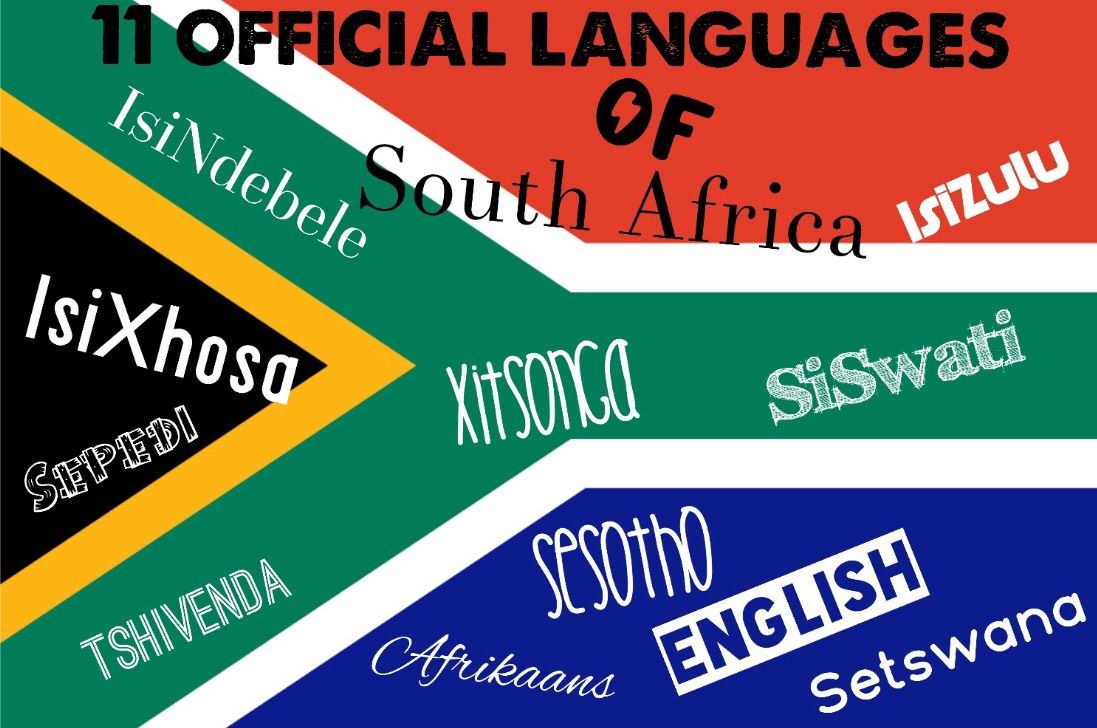

 <a id="four"></a>

## 2. Import  Packages
<a href=#cont>Back to Table of Contents</a>


the first step is importing all the important libraries and modules that will be needed to complete the experiment

In [4]:
import pandas as pd
import numpy as np

import re
import string

from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC 

from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

 <a id="five"></a>

## 3. Loading the Data
<a href=#cont>Back to Table of Contents</a>


we start off by loading both the test data and train data sets

In [5]:
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')





## 4.EXPLORATORY DATA ANALYSIS





In this step of data analysis, we explore the data and look at aspects
such as the shape of the data, the information in the data, the presence
of null or missing values and the data types


In [6]:
print(df_train.shape)
print(df_test.shape)

(33000, 2)
(5682, 2)


 to see how large our datasets is, i used the .shape() to see how many rows and columns are there for each set

In [7]:
df_train.head(3)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...


In [29]:
df_test.head(3)

,index,text,lang_id
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",tsn
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,nbl
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,ven


i used .head() to view the the columns and the information contained in the columns and rows

In [30]:
df_train.isnull()

,lang_id,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
32995,False,False
32996,False,False
32997,False,False
32998,False,False


there are no null values in our training set

In [9]:
df_train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

i checked for the number of unique values, the data has 11 languages with 3000 texts each and this can also help to see if there is any data imbalance

## 5.DATA CLEANING

at this stage i had to prepare the data by cleaning it, removing anything that may taint might experiment results or reduce the accuracy of the model

In [10]:
train_clean = df_train
test_clean = df_test

here we create a duplicate of the set to prepare it for cleaning, this is done incase we make a mistake during cleaning and we can still access the original dataset

In [11]:
''.join(train_clean['text'].tolist())[:1000]

'umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrikai-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layothe province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be monthso netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbjkhomishini ya ndinganyiso ya mbeu yo ewa maana

we get on overview of the texts in our dataset, from this we can get a glimpse of what the text column contains, the type of cleaning that might need to done, this will also serve us later on when we want to have a llok at the kind of changes made to the set

In [12]:
''.join(test_clean['text'].tolist())[:1000]

'Mmasepala, fa maemo a a kgethegileng a letlelela kgato eo.Uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho.Tshivhumbeo tshi fana na ngano dza vhathu.Kube inja nelikati betingevakala kutsi titsini naticocisana.Winste op buitelandse valuta.Ke feela dilense tše hlakilego, tša pono e tee goba tše pedi tšeo di lefelelwago. Kgetho ya diforeimo e a hwetšagala yeo maloko a ka kgethago go tšwa go yona. Ge o nyaka foreimo ya go bitša ga nnyane, o tla swanelwa ke go lefelela phapano yeo.<fn>(762010101403 AM) 1495 Final Gems Birthing Options_ZULU.txt</fn>Ntjhafatso ya konteraka ya mosebetsi: Etsa bonnete hore tsohle tse lokelwang ho ngolwa fatshe di entswe!u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezingapheli kuwo wonke amalunga. ukuze ukwazi ukuthola imithi yezifo ezingapheli kufanele ubhalise ohlelweni lwemithi yezifo ezingapheli, emva kokuthola isaziso sokuthi iyilunga elibhalisiwe lakwa-GEMS.So, on occasion, are statistics misused.J

we do the same thing with the test set, as you can see, the test set has alot of unwanted characters and alot of flaws or impurities in the data that need to be dealt with  before this feature is fed into the trained model

in the next step we create a function which simplifies the data cleaning process instead of having to do everything step by step

In [14]:

def clean_data(df): 
    
    clean_data = []
    
    for word in range(len(df)):
        texts=re.sub(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?',' ',df.iloc[word])
        texts=re.sub('[^a-zA-Z]',' ',texts)
        texts=texts.lower().split()
        texts=' '.join(texts)
        clean_data.append(texts)
        
    return clean_data

we define a function called "clean_data"  that takes in a series and we created an empty list that we will append the cleaned data to it, the for loop loops through the texts in the series, removing urls, removing numeric data, converting the text to lower case and then joining the texts into a single sentence before being put in the clean data list

## 6.MODEL BUILDING

In [15]:
X = train_clean['text']    
y = train_clean['lang_id']   

we split targets and features

In [16]:
train_clean2 = clean_data(X)

after having split the target to features, we call the clean data function at it takes in the x feature which contains the text, basically cleaning the text data

In [17]:
X_1 = train_clean2
y_1 = train_clean['lang_id']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2 , random_state = 42)


having cleaned the data ,i performed  a train test split

In [18]:
TDIF_vector= TfidfVectorizer(max_df=0.9, ngram_range=(1, 5), analyzer= 'char',max_features=10000)

X_train_1 = TDIF_vector.fit_transform(X_train_1).toarray() 
X_test_1 = TDIF_vector.transform(X_test_1).toarray()

since models can only interpret numeric data, we have to convert our text data to numeric using TfidfVectorizer, we start by declaring it as TDIF_vector and then fitting it and transforming it our data

in the next step i have chosen to use 3 models being namely Naive Bayes, support vector machine (SVC) and random forest model

In [ ]:
#Naive Bayes model
MNB_model = MultinomialNB()

MNB_model.fit(X_train_1, y_train_1)

y_prediction = MNB_model.predict(X_test_1)

f1score = f1_score(y_test_1, y_prediction, average= 'weighted')
print('macro f1 score:', f1score)
# Here i declared the model as MNB_model and thrb fitted it and made a first prediction


macro f1 score: 0.9978790422961998


In [23]:
#support vector machine
svc_model = LinearSVC()
svc_model.fit(X_train_1, y_train_1)
y_prediction2 = svc_model.predict(X_test_1)
f1score2 = f1_score(y_test_1, y_prediction2, average= 'weighted')
print('macro f1 score:', f1score2)


macro f1 score: 0.9989395280343618


In [27]:
#Random forest
RF_model = RandomForestClassifier()
RF_model.fit(X_train_1, y_train_1)
y_prediction3 = RF_model.predict(X_test_1)
f1score3 = f1_score(y_test_1, y_prediction3, average= 'weighted')
print('macro f1 score:', f1score3)

macro f1 score: 0.9971245803694544


## 7.Model selection

from our results above we see the support vectore machine model gives us the highest score amongst the 3 so its the best one to use to use on the unseen data

## 8.Submission 

In [24]:
#select the feature
X_test_2 = test_clean['text']

cleaned_data = clean_data(X_test_2)

X_final = TDIF_vector.transform(cleaned_data).toarray()                         


to make my submission on kaggle i had to select the feature for the test data and call the clean data function to clean the test data and named it "cleaned_data" and use TDIF_vector to convert the text data to numeric

In [25]:
test_prediction = svc_model.predict(X_final)

test_clean['lang_id'] = test_prediction
output = test_clean[['index', 'lang_id']]

output.to_csv('svc_model.csv', index = False)

in the above cell i convert the file to csv fromat

## 9.Conclusion

from my experiment, the svc model gave me the highest f1 score as well as a the highest kaggle submission score of 0.95054, making it the best model for language identification, my model can be further improved by doing more data cleaning and possible hyper parameter tuning to get a much better accuracy

## 10.References

In [ ]:
https://www.kaggle.com/datasets/basilb2s/language-detection
https://www.analyticsvidhya.com/blog/2021/03/language-detection-using-natural-language-processing/
https://thecleverprogrammer.com/2021/10/30/language-detection-with-machine-learning/
    image credit
https://www.aanshop.com/?category_id=2191061    